In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [28]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\data\01_raw\Skillswap_Data_Labeled.csv')

df1.head()

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,...,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status
0,Łukasz,łukasz.sezgin@gmx.de,25,Female,Local or Remote,52.376172,13.581876,Germany,Berlin,"['German', 'Portuguese', 'Russian', 'Mandarin ...",...,NaN,NaN,NaN,20.0,Very Satisfied,Dissatisfied,Very Satisfied,Very Dissatisfied,Dissatisfied,Swapper
1,Bianca,bianca.herrmann@icloud.com,25,Male,Remote Only,52.644114,13.648641,Germany,Berlin,"['Mandarin Chinese', 'Turkish', 'Romanian', 'J...",...,NaN,NaN,NaN,NaN,Very Satisfied,Dissatisfied,Very Dissatisfied,Satisfied,Neutral or Average,Inactive
2,Adlan,adlan.jacobi jäckel@gmx.de,21,Female,Local or Remote,52.531250,13.125491,Germany,Berlin,['Spanish'],...,NaN,NaN,NaN,NaN,Satisfied,Neutral or Average,Satisfied,Very Dissatisfied,Neutral or Average,Active User
3,Emilio,emilio.alemdar@web.de,28,Female,Local or Remote,52.450986,13.199572,Germany,Berlin,"['German', 'Spanish', 'Portuguese', 'Polish']",...,NaN,0.0,NaN,NaN,Satisfied,Satisfied,Very Satisfied,Neutral or Average,Very Satisfied,Occasional User
4,Valentin,valentin.çetin@t-online.de,31,Male,Local or Remote,52.599578,13.277228,Germany,Berlin,"['Mandarin Chinese', 'Hindi', 'Turkish']",...,22.0,NaN,NaN,NaN,Neutral or Average,Very Satisfied,Neutral or Average,Very Dissatisfied,Neutral or Average,Swapper


In [29]:
df1.info(96)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 106 columns):
 #    Column                                                         Dtype  
---   ------                                                         -----  
 0    First_Name                                                     object 
 1    EMail                                                          object 
 2    Age                                                            int64  
 3    Gender                                                         object 
 4    Location_Preferences                                           object 
 5    Latitude                                                       float64
 6    Longitude                                                      float64
 7    Country                                                        object 
 8    City                                                           object 
 9    Languages_Preferred                      

In [30]:
df1.describe()

,Age,Latitude,Longitude,Count_Programming_and_Software_Development_off,Count_Project_Management_off,Count_Accounting_and_Finance_off,Count_Marketing_and_Advertising_off,Count_Sales_and_Customer_Service_off,Count_Human_Resources_and_Leadership_off,Count_Graphic_Design_and_Illustration_off,...,Sum_Skills_Off,Sum_Skills_Rec,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills
count,750.000000,750.000000,750.000000,18.000000,16.000000,12.000000,20.000000,17.000000,23.000000,19.000000,...,750.000000,750.000000,106.000000,88.000000,69.000000,106.000000,94.000000,94.000000,101.000000,92.000000
mean,26.476000,52.505243,13.424002,12.555556,15.375000,16.000000,15.100000,13.352941,11.304348,12.526316,...,11.297333,11.297333,13.707547,11.715909,11.115942,9.556604,11.936170,9.712766,12.227723,10.206522
std,2.093626,0.097731,0.193477,8.932572,9.024965,13.094065,9.369042,7.390375,8.363529,9.045370,...,8.755749,9.035215,9.180691,7.895800,9.425460,8.439228,9.430913,8.440331,8.930712,7.652534
min,21.000000,52.339196,13.088654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,52.419247,13.252727,5.000000,8.750000,9.000000,7.000000,7.000000,5.500000,7.500000,...,4.000000,4.000000,7.000000,5.000000,5.000000,1.250000,3.000000,2.250000,5.000000,3.000000
50%,27.000000,52.500041,13.421178,12.000000,15.500000,11.500000,15.500000,14.000000,10.000000,13.000000,...,11.000000,10.000000,13.500000,12.000000,9.000000,7.500000,12.000000,9.000000,12.000000,10.500000
75%,28.000000,52.592218,13.585990,18.750000,19.500000,26.000000,24.250000,19.000000,17.500000,16.500000,...,17.000000,18.000000,20.500000,16.000000,17.000000,15.000000,18.750000,16.000000,17.000000,16.000000
max,32.000000,52.672040,13.759462,31.000000,33.000000,43.000000,29.000000,25.000000,28.000000,34.000000,...,43.000000,36.000000,43.000000,34.000000,35.000000,31.000000,38.000000,34.000000,34.000000,27.000000


In [31]:
# Count nan values
pd.set_option('display.max_rows', None)
null_counts = df1.isnull().sum()
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
null_counts_df.head(20)

,Null Count
First_Name,0
EMail,0
Age,0
Gender,0
Location_Preferences,0
Latitude,0
Longitude,0
Country,0
City,0
Languages_Preferred,0


In [32]:
# Count unique values
pd.set_option('display.max_rows', None)
unique_counts = df1.nunique()
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique Count'])
unique_counts_df.head()


,Unique Count
First_Name,636
EMail,750
Age,12
Gender,4
Location_Preferences,3


In [33]:
#Top 10 Teachers
df1.sort_values(by="Sum_Skills_Off", ascending=False)[["First_Name", "Sum_Skills_Off"]].head(10)

,First_Name,Sum_Skills_Off
720,Carlota,43.0
63,Guilherme,38.0
363,Colette,35.0
435,Lucas,34.0
670,Maksur,34.0
169,Marianela,34.0
637,Jeremi,34.0
127,Karina,33.0
520,Cyprian,33.0
196,Adelasia,32.0


In [34]:
#Top 10 Learners
df1.sort_values(by="Sum_Skills_Rec", ascending=False)[["First_Name", "Sum_Skills_Rec"]].head(10)

,First_Name,Sum_Skills_Rec
89,Joel,36.0
363,Colette,36.0
547,Rosie,36.0
61,Ünal,36.0
720,Carlota,36.0
435,Lucas,36.0
607,Alphonse,35.0
725,Javi,35.0
591,Elhan,35.0
297,Lara,35.0


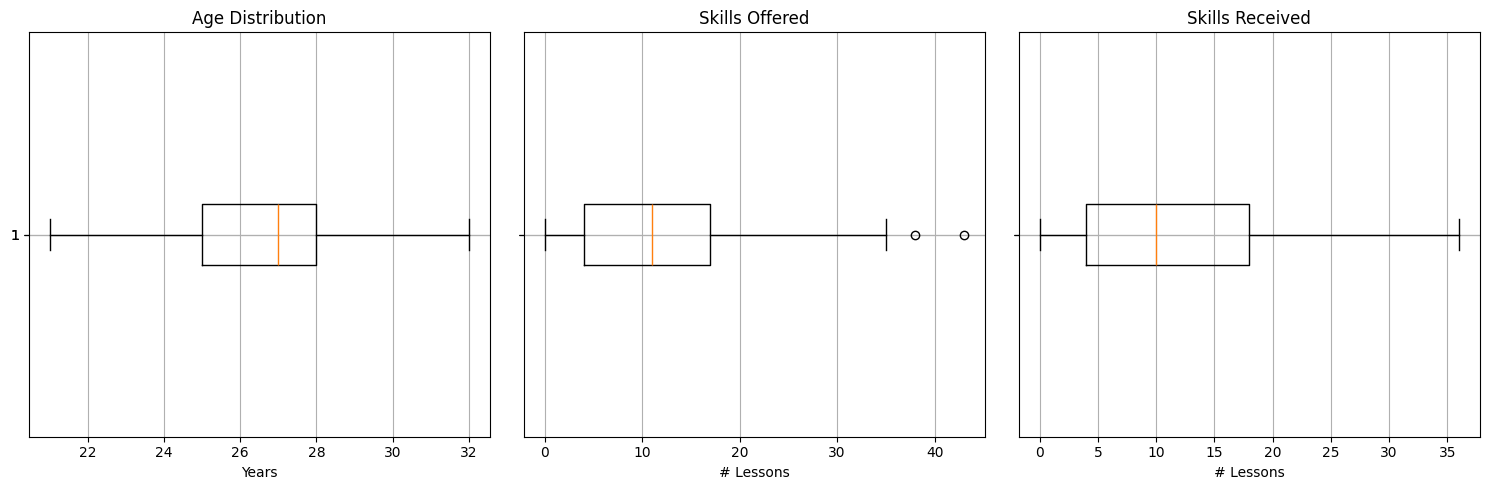

In [35]:
# Find outliers using boxplots

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.5) 

# Age Distribution
axes[0].boxplot(df1['Age'], vert=False)
axes[0].set_xlabel('Years')
axes[0].set_title('Age Distribution')
axes[0].grid(True)

# Skills Offered
axes[1].boxplot(df1['Sum_Skills_Off'], vert=False)
axes[1].set_xlabel('# Lessons')
axes[1].set_title('Skills Offered')
axes[1].grid(True)

# Skills Received
axes[2].boxplot(df1['Sum_Skills_Rec'], vert=False)
axes[2].set_xlabel('# Lessons')
axes[2].set_title('Skills Received')
axes[2].grid(True)

plt.tight_layout()
plt.show()



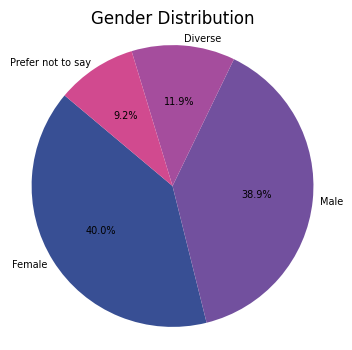

In [36]:
gender_counts = df1['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = ['#384f94', '#72509e', '#a54d9d', '#d14a8f'], textprops={'fontsize': 7}, labeldistance=1.05)
plt.title('Gender Distribution', fontsize=12)
plt.axis('equal')  
plt.show()

In [37]:
# Show how the different genders are teaching skills in the different skill domains
skill_domains = [
    "Professional_Skills",
    "Creative_Skills",
    "Language_Skills",
    "Technical_Skills",
    "Social_Skills",
    "Practical_Skills",
    "Academic_Skills",
    "Life_Skills"
]

df2 = df1[['Gender'] + skill_domains]

df2.head()


,Gender,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills
0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,Male,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
2,Female,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,Male,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN


In [38]:
# In absolute values
gender_sum = {}

for skill_domain in skill_domains:
    gender_sum[skill_domain] = df1.groupby('Gender')[skill_domain].sum()

gender_sum_df = pd.DataFrame(gender_sum)

column_sums = gender_sum_df.sum()
gender_sum_df.loc['Total'] = column_sums
gender_sum_df = gender_sum_df.astype(int)

gender_sum_df.head()


,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills
Gender,,,,,,,,
Diverse,217,60,41,186,176,100,105,127
Female,761,296,300,381,404,301,605,348
Male,341,527,388,318,459,415,425,344
Prefer not to say,134,148,38,128,83,97,100,120
Total,1453,1031,767,1013,1122,913,1235,939


In [39]:
# In relative values
percentage_df = gender_sum_df.drop(index='Total').div(gender_sum_df.drop(index='Total').sum()) * 100
percentage_df = percentage_df.applymap(lambda x: f'{x:.2f}%')

percentage_df = pd.concat([percentage_df, gender_sum_df.loc[['Total']]])

percentage_df


C:\Users\Johannes\AppData\Local\Temp\ipykernel_14708\590657054.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  percentage_df = percentage_df.applymap(lambda x: f'{x:.2f}%')


,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills
Gender,,,,,,,,
Diverse,14.93%,5.82%,5.35%,18.36%,15.69%,10.95%,8.50%,13.53%
Female,52.37%,28.71%,39.11%,37.61%,36.01%,32.97%,48.99%,37.06%
Male,23.47%,51.12%,50.59%,31.39%,40.91%,45.45%,34.41%,36.63%
Prefer not to say,9.22%,14.35%,4.95%,12.64%,7.40%,10.62%,8.10%,12.78%
Total,1453,1031,767,1013,1122,913,1235,939


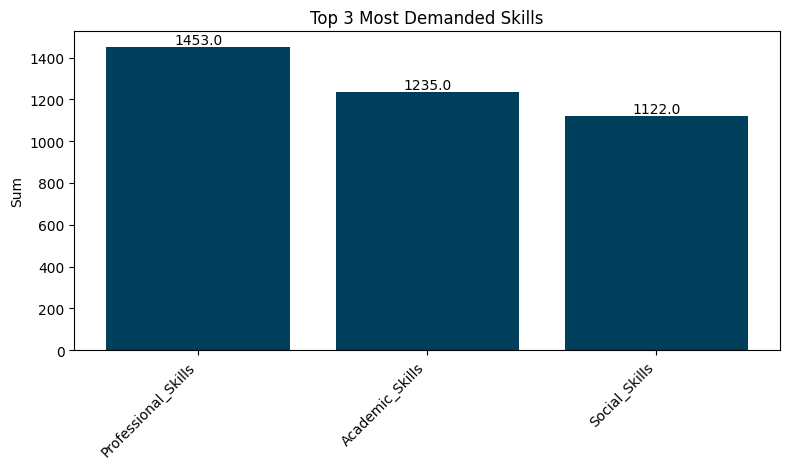

In [40]:
# Top 3 Most Demanded Skills
sums = {}
for skill_domain in skill_domains:
    sums[skill_domain] = df1[skill_domain].sum()

top_3 = sorted(sums.items(), key=lambda x: x[1], reverse=True)[:3]

top_3_skills = [item[0] for item in top_3]
top_3_values = [item[1] for item in top_3]

plt.figure(figsize=(8, 4.8))
plt.bar(top_3_skills, top_3_values, color='#003f5c')

plt.ylabel('Sum')
plt.title('Top 3 Most Demanded Skills')

for i, value in enumerate(top_3_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


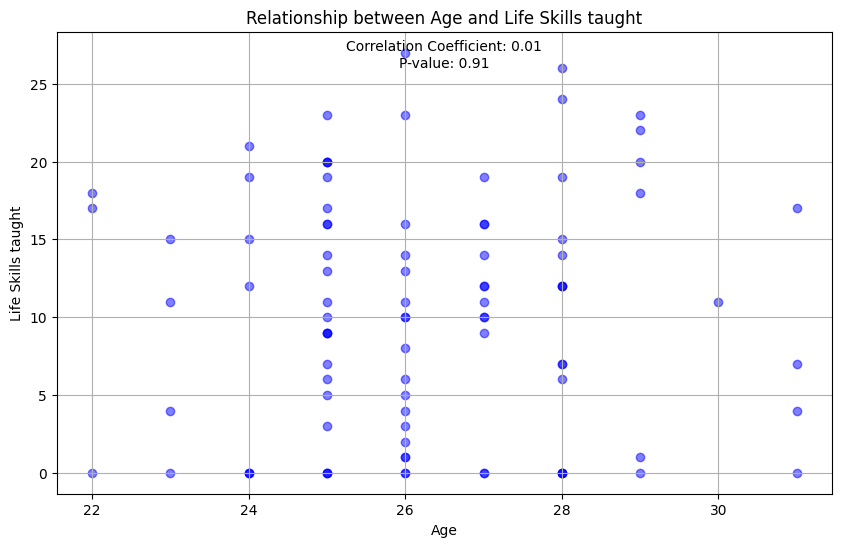

In [41]:
# Plot relation between age and life skills taught
df_cleaned = df1.dropna(subset=['Age', 'Life_Skills'])

ages = df_cleaned['Age']
life_skills = df_cleaned['Life_Skills']

plt.figure(figsize=(10, 6))
plt.scatter(ages, life_skills, color='blue', alpha=0.5)  
plt.title('Relationship between Age and Life Skills taught')
plt.xlabel('Age')
plt.ylabel('Life Skills taught')
plt.grid(True)  


correlation_coef, p_value = stats.pearsonr(ages, life_skills)
plt.text(0.5, 0.95, f'Correlation Coefficient: {correlation_coef:.2f}\nP-value: {p_value:.2f}', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


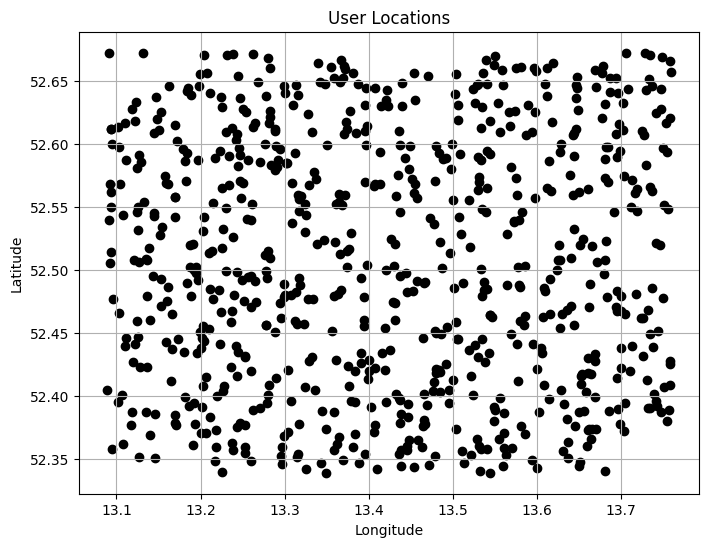

In [42]:
# Create coordinates from latitude and longitude columns
coordinates = [(lat, lon) for lat, lon in zip(df1['Latitude'], df1['Longitude'])]

lats, lons = zip(*coordinates)

plt.figure(figsize=(8, 6))
plt.scatter(lons, lats, color='black', marker='o')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User Locations')
plt.grid(True)
plt.show()